### Задание
1. Вырезать объект с неоднородного фона с использованием маски. <br>
2. Сохранить полученную картинку в формате PNG с альфа-каналом (прозрачностью).

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def imgshow(image, conversion=cv2.COLOR_BGR2RGB):
    image = cv2.cvtColor(image, conversion)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show();

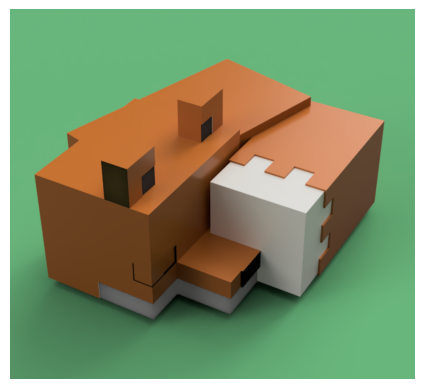

In [2]:
# Импортируем исходную картинку
img = cv2.imread('pictures/fox.png')
imgshow(img)

Для более удобной работы с отделением фона преобразуем цветовое пространство BGR в HSV при помощи функции cv2.cvtColor().<br>
Цветовое пространство HSV (англ. Hue, Saturation, Value — цветовой тон, насыщенность, значение/яркость). 

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Для отделения яркого объекта нам нужно взять нижний и верхний пороги границы цвета. В нашем случае это оранжевый цвет, запишем эти значения в массив.

In [4]:
lower_bound = np.array([0, 0, 0])	 
upper_bound = np.array([64, 255, 255])

Создадим маску, в которой отделим объект на основе границ цвета.

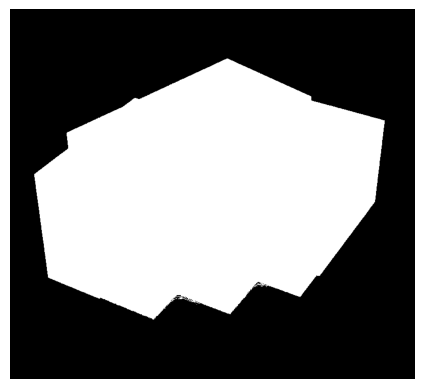

In [5]:
mask = cv2.inRange(hsv, lower_bound, upper_bound)
imgshow(mask)

Теперь вычтем эту маску из изображения, для этого используем функцию cv2.bitwise_and() и получим объект без фона.

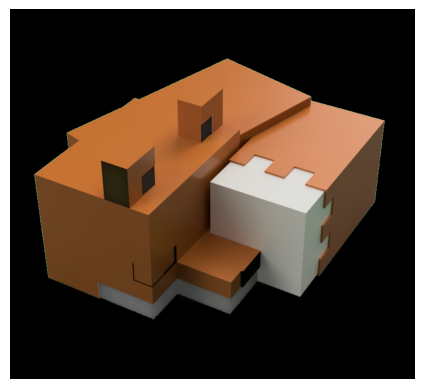

In [6]:
segmented_img = cv2.bitwise_and(img, img, mask=mask)
imgshow(segmented_img)

Сохраним полученное изображение в формате PNG с прозрачностью. <br>
Сделать это можно при помощи конвертации изображения в серый, а затем функцией cv2.threshold() с последующим слиянием каналов изображения с альфа-каналом.

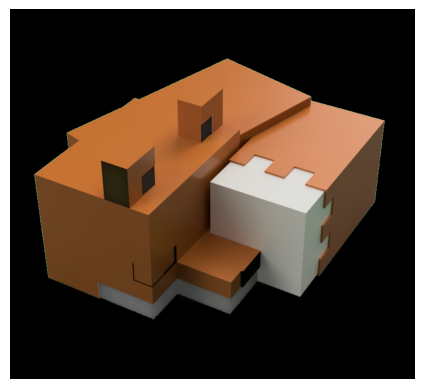

In [7]:
gray_img = cv2.cvtColor(segmented_img, cv2.COLOR_BGR2GRAY)
_, alpha = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY)
  
# Разделяем цветовые каналы
b, g, r = cv2.split(segmented_img)
  
# Список из каналов, включая альфа-канал (прозрачность)
rgba = [b, g, r, alpha]
  
# Совмещаем каналы
result_thres = cv2.merge(rgba, 4)
  
# Записываем изображение
cv2.imwrite("pictures/fox_threshold.png", result_thres)
imgshow(result_thres)

Для более лучшего результата, вместо использования функции threshold можно добавить маске альфа-канал.

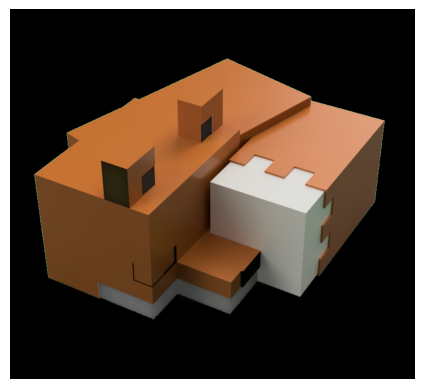

In [8]:
result_add = segmented_img.copy()
result_add = cv2.cvtColor(result_add, cv2.COLOR_BGR2BGRA)
result_add[:, :, 3] = mask

cv2.imwrite('pictures/fox_add.png', result_add)
imgshow(result_add)